Atalov S. (TSI AUCA)

## Introduction to PyTorch. Implementing simple Perceptron model

In [1]:
import numpy as np

from matplotlib import pyplot as plt

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

import torch
from torch import nn
from torch.nn import functional as F
import torch.optim as optim

from torch.utils.data import TensorDataset, DataLoader


### Генерация данных
Сгенерируем датасет для примера

In [2]:
X, y = make_moons(n_samples=10000, random_state=42, noise=0.1)

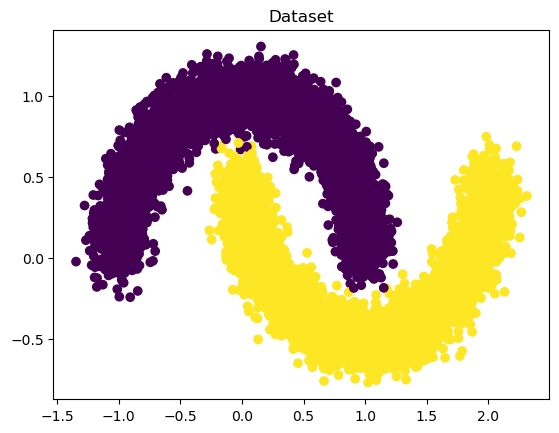

In [3]:
plt.title("Dataset")
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [5]:
X_train.shape

(7500, 2)

### Загрузка данных
В PyTorch загрузка данных как правило происходит налету (иногда датасеты не помещаются в оперативную память). Для этого используются две сущности `Dataset` и `DataLoader`.

1.   `Dataset` загружает каждый объект по отдельности.

2.   `DataLoader` группирует объекты из `Dataset` в батчи.

Так как наш датасет достаточно маленький мы будем использовать `TensorDataset`. Все, что нам нужно, это перевести из массива numpy в тензор с типом `torch.float32`.

In [6]:
type(X_train)

numpy.ndarray

In [7]:
# Train data as torch tensor
X_train_t =  torch.tensor(X_train, dtype=torch.float32)
y_train_t =  torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

# Test data as torch tensor
X_test_t =  torch.tensor(X_test, dtype=torch.float32)
y_test_t =  torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [9]:
X_train

array([[ 0.50202001, -0.33758011],
       [-0.02001968,  0.239079  ],
       [ 0.57026061,  0.81166576],
       ...,
       [ 0.32163146, -0.35671524],
       [ 2.01344205,  0.03227946],
       [ 0.17908235,  0.93097468]])

In [8]:
X_train_t

tensor([[ 0.5020, -0.3376],
        [-0.0200,  0.2391],
        [ 0.5703,  0.8117],
        ...,
        [ 0.3216, -0.3567],
        [ 2.0134,  0.0323],
        [ 0.1791,  0.9310]])

In [10]:
X_train_t.shape

torch.Size([7500, 2])

In [11]:
train_dataset = TensorDataset(X_train_t, y_train_t)
test_dataset = TensorDataset(X_test_t, y_test_t)

In [12]:
train_dataloader = DataLoader(train_dataset, batch_size=128)
val_dataloader = DataLoader(test_dataset, batch_size=128)

### Построение модели

In [18]:
# Define the Perceptron model
class Perceptron(nn.Module):
    def __init__(self, input_dim):
        super(Perceptron, self).__init__()
        # Single linear layer
        self.talant_layer = nn.Linear(input_dim, 1) # fc means fully connected

    def forward(self, x):
        # Applying sigmoid activation function to get binary output
        z = self.talant_layer(x)
        a = torch.sigmoid(z)
        return a



In [19]:
Perceptron

__main__.Perceptron

In [20]:
X_train

array([[ 0.50202001, -0.33758011],
       [-0.02001968,  0.239079  ],
       [ 0.57026061,  0.81166576],
       ...,
       [ 0.32163146, -0.35671524],
       [ 2.01344205,  0.03227946],
       [ 0.17908235,  0.93097468]])

In [26]:
# Example: assuming we have 2 features in our dataset
input_dim = 2
model = Perceptron(input_dim)

In [27]:
model

Perceptron(
  (talant_layer): Linear(in_features=2, out_features=1, bias=True)
)

In [28]:
# Model parameters
model.parameters()

<generator object Module.parameters at 0x3204a6180>

In [29]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.0910, -0.6112]], requires_grad=True),
 Parameter containing:
 tensor([0.0570], requires_grad=True)]

In [30]:
for name, param in model.named_parameters():
    print(name, param.data)

talant_layer.weight tensor([[ 0.0910, -0.6112]])
talant_layer.bias tensor([0.0570])


### Лосс и оптимизация

In [31]:
# Loss and optimizer
criterion = nn.BCELoss()  # Binary Cross Entropy Loss for binary classification
# https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html

optimizer = optim.SGD(model.parameters(), lr=0.05)  # Stochastic Gradient Descent

### Процесс обучения модели

In [ ]:
max_epochs = 10

Вот псевдокод, который поможет вам разобраться в том, что происходит во время обучения

```python
for epoch in range(max_epochs):  # <----------- итерируемся по датасету несколько раз
    for x_batch, y_batch in dataset:  # <------ итерируемся по датасету.
        optimizer.zero_grad()  # <------------- обуляем градиенты модели
        outp = model(x_batch)  # <------------- получаем предикты из модели
        loss = loss_func(outp, y_batch)  # <--- считаем "лосс" для логистической регрессии
        loss.backward()  # <------------------- считаем градиенты
        optimizer.step()  # <------------------ делаем шаг градиентного спуска
  ```

In [ ]:
# w = w + alpha*dj/dw

### Тренировка модели

#### Epochs
Произошла одна эпоха (epoch) — весь датасет прошел через нейронную сеть в прямом и обратном направлении только один раз.

Так как одна эпоха слишком велика для используемой вычислительной мощности, датасет делят на маленькие партии — батчи.

#### Batch Size в нейронных сетях
Размер батча — это общее число тренировочных объектов, представленных в одном батче.

Отметим: Размер батча и число батчей — два разных параметра.

Что такое батч?
Нельзя пропустить через нейронную сеть разом весь датасет. Поэтому делим данные на пакеты, сеты или партии.

In [32]:
# parameters before training

for name, param in model.named_parameters():
    print(name, param.data)

talant_layer.weight tensor([[ 0.0910, -0.6112]])
talant_layer.bias tensor([0.0570])


In [38]:
losses = [] # to store average loss of every epoch

num_epochs = 50  # Number of epochs

# Sample training loop
for epoch in range(num_epochs):  # loop over the dataset multiple times
    epoch_loss = 0.
    for inputs, labels in train_dataloader:
        optimizer.zero_grad()  # zero the parameter gradients

        outputs = model(inputs)  # forward pass

        loss = criterion(outputs, labels)  # compute loss (y_pred, y)

        loss.backward()  # backward pass (calculate gradients)

        optimizer.step()  # update weights (w = w - lr*dj/dw)

        epoch_loss += loss.item()  # Summing up the loss for each batch

    losses.append(epoch_loss / len(train_dataloader))  # Average loss for the epoch

In [39]:
# Parameters after training
for name, param in model.named_parameters():
    print(name, param.data)

talant_layer.weight tensor([[ 1.1700, -4.6735]])
talant_layer.bias tensor([0.5578])


### Лосс и эпохи

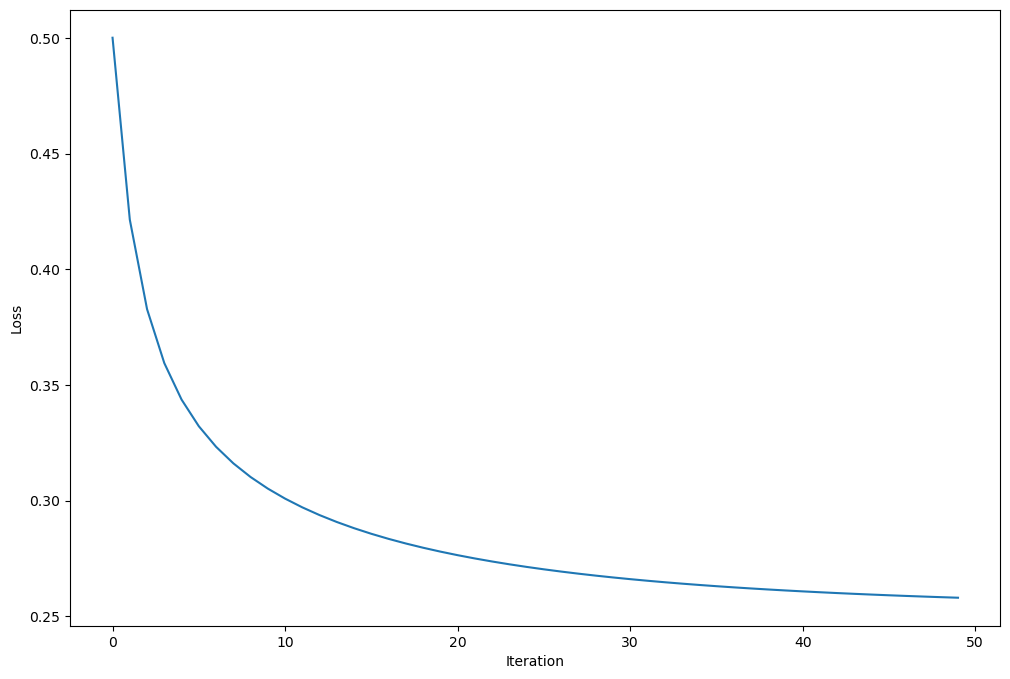

In [40]:
plt.figure(figsize=(12, 8))
plt.plot(range(len(losses)), losses)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

### Проверка точности модели

### INFERENCE

In [41]:
# Example evaluation code
with torch.no_grad():
    # predict
    y_pred = model(X_test_t)

In [44]:
# Example evaluation code
with torch.no_grad():
    # predict
    y_pred = model(X_test_t)
    # probability to 0 or 1
    y_pred_class = y_pred.round()
    # accuracy = true / all
    accuracy = (y_pred_class.eq(y_test_t).sum() / float(y_test_t.shape[0])).item()
    print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.8904


In [45]:
y_pred = y_pred_class.numpy()

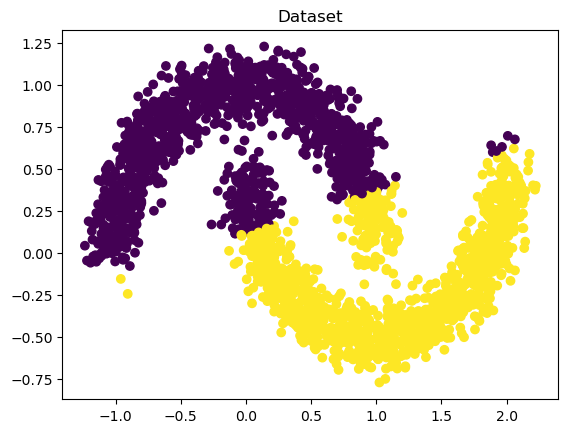

In [46]:
plt.title("Dataset")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.show()

In [47]:
from sklearn.linear_model import LogisticRegression